In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
!pip install xlrd

In [2]:

df_indicators=pd.read_csv("economic_indicators_dataset_2010_2023.csv",index_col=None)
df_indicators.reset_index(drop=True,inplace=True)
df_speeches=pd.read_excel("Book1.xlsx", sheet_name='CBS_dataset_v1 0')

#df_speeches=pd.read_csv("Book1.csv")
#df_speeches.to_excel("Speeches_kaggle.xlsx")

df_speeches.reset_index(drop=True,inplace=True)
df_iso_converter=pd.read_excel("iso_3digit_alpha_country_codes.xls",index_col=None)
#top(df_speeches)
#print("df_speeches Countries",df_speeches["Country"].unique())
#print("df_indicators Countries",df_indicators["Country"].unique())
#Data exploration stage steps:
#1. Join data sets by date
#2. Add in another data for labeling third word country or not?
#3. Try to explore word representation-vectorizing or some other way,check if there's
#a score system you can use too
#4. See if you can make own encoder-decoder architectur and use a model of your own
#5. Can part of speech tagging be used as a feature?

In [ ]:
df_speeches

In [6]:
print("Maximum Date",max(df_speeches["Date"]))
print("Minimum Date", min(df_speeches["Date"]))

Maximum Date 2025-04-07 00:00:00
Minimum Date 1986-01-06 00:00:00


In [3]:
import requests
import pandas as pd
from time import sleep

api_key = "0U0YJ5PA109O6MYR"  # Replace with your Alpha Vantage API key
base_url = "https://www.alphavantage.co/query"

# List of economic keywords to search for
keywords = ["GDP"]

# Store results here
all_articles = []

for keyword in keywords:
    params = {
        "function": "NEWS_SENTIMENT",
        "topics": keyword,
        "apikey": api_key
    }

    print(f"Fetching news for keyword: {keyword}")
    response = requests.get(base_url, params=params)
    data = response.json()

    if "feed" not in data:
        print(f"Error fetching data for keyword {keyword}: {data}")
        continue

    for article in data["feed"]:
        all_articles.append({
            "keyword": keyword,
            "title": article["title"],
            "summary": article.get("summary"),
            "url": article["url"],
            "time_published": article["time_published"],
            "sentiment_score": article.get("overall_sentiment_score"),
            "source": article.get("source")
        })

    sleep(12)  # Respect API limit of 5 requests per minute

# Convert to DataFrame
df_news= pd.DataFrame(all_articles)
df_news["time_published"] = pd.to_datetime(df_news["time_published"])
df_news.head()

Fetching news for keyword: GDP


,keyword,title,summary,url,time_published,sentiment_score,source
0,GDP,Venus Concept Stock Is Soaring On Friday - Her...,Venus Concept sells hair restoration business ...,https://www.benzinga.com/trading-ideas/movers/...,2025-06-06 18:53:56,0.266859,Benzinga
1,GDP,Has The Tesla Reversal Started? - Tesla ( NAS...,Yesterday's sell-off in Tesla ( TSLA ) may hav...,https://www.benzinga.com/markets/equities/25/0...,2025-06-06 18:53:32,0.075774,Benzinga
2,GDP,reVolver Podcasts Welcomes Media Powerhouse La...,Celebrity Radio Host and Fan Favorite from La ...,https://www.benzinga.com/pressreleases/25/06/n...,2025-06-06 18:51:00,0.446716,Benzinga
3,GDP,Big Techs consider adopting stablecoins as GEN...,The market capitalization for stablecoins has ...,https://cointelegraph.com/news/big-tech-consid...,2025-06-06 18:49:54,0.146011,Cointelegraph
4,GDP,Vail Resorts' Near-Term Strategy Centers On Ma...,Vail Resorts reported third-quarter earnings o...,https://www.benzinga.com/analyst-stock-ratings...,2025-06-06 18:46:58,0.215775,Benzinga


In [4]:
countries = ['USA', 'Canada', 'India', 'Japan', 'China', 'France', 'Germany', 'Australia']

def country_filter(row):
    for country in countries:
        if country.lower() in (row['title'] + row['summary']).lower():
            return country
    return "Other"

df_news["Country"] = df_news.apply(country_filter, axis=1)

In [5]:
df_news["Country"].unique()
df_news

,keyword,title,summary,url,time_published,sentiment_score,source,Country
0,GDP,Venus Concept Stock Is Soaring On Friday - Her...,Venus Concept sells hair restoration business ...,https://www.benzinga.com/trading-ideas/movers/...,2025-06-06 18:53:56,0.266859,Benzinga,Other
1,GDP,Has The Tesla Reversal Started? - Tesla ( NAS...,Yesterday's sell-off in Tesla ( TSLA ) may hav...,https://www.benzinga.com/markets/equities/25/0...,2025-06-06 18:53:32,0.075774,Benzinga,Other
2,GDP,reVolver Podcasts Welcomes Media Powerhouse La...,Celebrity Radio Host and Fan Favorite from La ...,https://www.benzinga.com/pressreleases/25/06/n...,2025-06-06 18:51:00,0.446716,Benzinga,Other
3,GDP,Big Techs consider adopting stablecoins as GEN...,The market capitalization for stablecoins has ...,https://cointelegraph.com/news/big-tech-consid...,2025-06-06 18:49:54,0.146011,Cointelegraph,Other
4,GDP,Vail Resorts' Near-Term Strategy Centers On Ma...,Vail Resorts reported third-quarter earnings o...,https://www.benzinga.com/analyst-stock-ratings...,2025-06-06 18:46:58,0.215775,Benzinga,Other
5,GDP,Kwanza Jones Introduces Inaugural Innovator Aw...,"This year, SUPERCHARGED® CEO Kwanza Jones retu...",https://www.benzinga.com/pressreleases/25/06/n...,2025-06-06 18:45:00,0.443448,Benzinga,Other
6,GDP,SoFi Loan Boom Impresses But Bank Of America S...,"Recently, SoFi's Chief Financial Officer Chris...",https://www.benzinga.com/analyst-stock-ratings...,2025-06-06 18:43:00,0.402175,Benzinga,Other
7,GDP,Why L3Harris Might Be The Most Undervalued Sto...,L3Harris Technologies Inc. ( NYSE: LHX ) trade...,https://www.benzinga.com/markets/equities/25/0...,2025-06-06 18:32:14,0.298759,Benzinga,Other
8,GDP,"Fartcoin Jumps 4% While Dogecoin, Shiba Inu Fa...",Fartcoin ranks among the top three crypto gain...,https://www.benzinga.com/crypto/cryptocurrency...,2025-06-06 18:31:52,0.275212,Benzinga,Other
9,GDP,Why Circle's 'Super Positive' IPO Could be Bul...,"As blockchain-based infrastructure, Ethereum u...",https://decrypt.co/324046/why-circles-super-po...,2025-06-06 18:28:39,0.245696,Decrypt.co,Other


In [6]:
pip install fredapi

In [7]:
from fredapi import Fred
import pandas as pd

# Replace with your FRED API key
fred = Fred(api_key='bd8d6b58c628f7f1cef25491d6174ba2')

# Define GDP indicators by country (FRED series IDs)
gdp_indicators = {
    'USA': 'GDP',
    'Germany': 'LRGDPCHDEM',
    'France': 'CLVMNACSCAB1GQFR',
    'India': 'NYGDPMKTPCDIN',
    'Canada': 'CANRGDPR',
    'Japan': 'JPNRGDPR',
    'China': 'CHNGDPR',
    'Australia': 'AUSRGDPR'
}

start_date = '1986-01-06'
end_date = '2025-04-07'

# Collect GDP data
gdp_data = []
for country, series_id in gdp_indicators.items():
    try:
        series = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)
        df_temp = pd.DataFrame({
            'Date': series.index,
            'GDP Growth Rate (%)': series.values,
            'Country': country
        })
        gdp_data.append(df_temp)
    except Exception as e:
        print(f"Error fetching data for {country}: {e}")

# Concatenate all into one DataFrame
df_gdp = pd.concat(gdp_data)

# Optional: sort by date and country
df_gdp = df_gdp.sort_values(by=['Date', 'Country'])

# Preview
print(df_gdp.head())
#print(len(df_gdp.dropna()))

Error fetching data for Germany: Bad Request.  The series does not exist.
Error fetching data for India: Bad Request.  The series does not exist.
Error fetching data for China: Bad Request.  The series does not exist.
        Date  GDP Growth Rate (%)    Country
0 1986-01-01           411287.000  Australia
0 1986-01-01           754708.000     Canada
0 1986-01-01           301524.900     France
0 1986-01-01          2954025.000      Japan
0 1986-01-01             4507.894        USA


In [8]:
df_gdp
df_gdp['Year'] = df_gdp['Date'].dt.year


In [9]:
df_indicators.head(3)
df_iso_converter.head(3)
df_indicators.head(3)
#print(df_indicators.columns())
df_speeches.head(3)
df_news.head(3)

,keyword,title,summary,url,time_published,sentiment_score,source,Country
0,GDP,Venus Concept Stock Is Soaring On Friday - Her...,Venus Concept sells hair restoration business ...,https://www.benzinga.com/trading-ideas/movers/...,2025-06-06 18:53:56,0.266859,Benzinga,Other
1,GDP,Has The Tesla Reversal Started? - Tesla ( NAS...,Yesterday's sell-off in Tesla ( TSLA ) may hav...,https://www.benzinga.com/markets/equities/25/0...,2025-06-06 18:53:32,0.075774,Benzinga,Other
2,GDP,reVolver Podcasts Welcomes Media Powerhouse La...,Celebrity Radio Host and Fan Favorite from La ...,https://www.benzinga.com/pressreleases/25/06/n...,2025-06-06 18:51:00,0.446716,Benzinga,Other


In [10]:
df_speeches[df_speeches["Country"]=="forged in the flames of fickle seasons and overseas markets"]
iso_converter={}
for i in range(len(df_iso_converter)):
    iso_converter[df_iso_converter.loc[i,"ISO 3-Digit Alpha Country Code"]]=df_iso_converter.loc[i,"Unnamed: 1"]
df_speeches["ISO-3 Code"]=df_speeches["Country"]
country_converted=[]
for i in range(len(df_speeches)):
    if df_speeches.loc[i,"Country"] in iso_converter.keys():
        if df_speeches.loc[i,"Country"]=="USA":
            country_converted.append("USA")
            df_speeches.loc[i,"Country"]="USA"
            next
        country_converted.append(iso_converter[df_speeches.loc[i,"Country"]])
        df_speeches.loc[i,"Country"]=country_converted[i]
    else:
        country_converted.append("")
print(df_speeches["Country"])

0         Aruba
1         Aruba
2         Aruba
3         Aruba
4         Aruba
          ...  
185458      NaN
185459      NaN
185460      NaN
185461      NaN
185462      NaN
Name: Country, Length: 185463, dtype: object


In [11]:
df_indicators['Date'] = pd.to_datetime(df_indicators['Date'], utc=True)
df_speeches["Date"]= pd.to_datetime(df_speeches['Date'], utc=True)
df_news["Date"]=df_news["time_published"]
df_news["text"]=df_news["summary"]
df_news["Date"]= pd.to_datetime(df_news['Date'], utc=True)


df_gdp['Year'] = (df_gdp['Date'].dt.year).astype(int)
df_news['Year'] = (df_news['Date'].dt.year).astype(int)
df_speeches['Year'] = (df_news['Date'].dt.year).astype(int)
#detecting all rows with no date values
#null_rows = df_speeches[df['Year'].isna()]

# Replace null GDP values with 0
df_speeches['Year'].fillna(0, inplace=True)


df_speeches['Year']=df_speeches['Year'].astype(int)
df_indicators['Year'] = (df_indicators['Date'].dt.year).astype(int)
#df_initial_merged=pd.concat([df_news,df_speeches[["Date","Country","text"]]],ignore_index=True)
df_merged=pd.merge(df_speeches,df_gdp,on=["Year","Country"])
print(len(df_merged))
df_merged.isnull().sum()
print(df_speeches["Year"])

#Look into any news and date, honestly thats the best we got -->maybe time to focus on the
#streamlit part instead

0
0         2025
1         2025
2         2025
3         2025
4         2025
          ... 
185458       0
185459       0
185460       0
185461       0
185462       0
Name: Year, Length: 185463, dtype: int64


<ipython-input-11-c52353d82b99>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_speeches['Year'].fillna(0, inplace=True)


In [12]:
def clean_and_merge_data(df_indicators, df_speeches, df_news, df_gdp):
    """
    Clean and merge textual news data with speeches, then match with GDP data.
    """

    # Step 1: Standardize date columns and convert to datetime
    print("Step 1: Processing dates...")

    # Convert all date columns to datetime with UTC timezone
    df_indicators['Date'] = pd.to_datetime(df_indicators['Date'], utc=True)
    df_speeches['Date'] = pd.to_datetime(df_speeches['Date'], utc=True)

    # For news data, use time_published as the date source
    df_news['Date'] = pd.to_datetime(df_news['time_published'], utc=True)
    df_news['text'] = df_news['summary']  # Standardize text column



    # Step 2: Clean and handle missing values while extracting year from dates
    print("Step 3: Handling missing values...")

    # Fill missing years with a placeholder (like 0) or drop them
    initial_speech_count = len(df_speeches)
    df_speeches["Year"]=df_speeches['Date'].dt.year
    df_speeches['Year'].fillna(0, inplace=True)
    df_speeches['Year'] = df_speeches['Year'].astype(int)

    df_indicators['Year'] = df_indicators['Date'].dt.year.astype(int)
    df_news['Year'] = df_news['Date'].dt.year.astype(int)

    # Handle GDP data (assuming it has a Date column)
    df_gdp['Year'] = pd.to_datetime(df_gdp['Date']).dt.year.astype(int)


    # Step 3: Clean and handle missing values
    print("Step 3: Handling missing values...")

    # Fill missing years with a placeholder (like 0) or drop them
    initial_speech_count = len(df_speeches)
    df_speeches['Year'].fillna(0, inplace=True)
    df_speeches['Year'] = df_speeches['Year'].astype(int)

    # Remove rows with Year = 0 if they represent invalid data
    df_speeches_clean = df_speeches[df_speeches['Year'] != 0].copy()
    print(f"Removed {initial_speech_count - len(df_speeches_clean)} speeches with invalid dates")

    # Step 4: Merge news and speeches data
    print("Step 4: Merging news and speeches...")

    # Ensure both dataframes have consistent columns for merging
    news_columns = ['Country','Date', 'Year', 'text']


    speech_columns = ['Date', 'Year', 'Country', 'text']

    # Select relevant columns and add source identifier
    df_news_subset = df_news[news_columns].copy()
    df_news_subset['source'] = 'news'

    df_speeches_subset = df_speeches_clean[speech_columns].copy()
    df_speeches_subset['source'] = 'speech'

    # Combine news and speeches
    df_textual_combined = pd.concat([df_speeches_subset, df_news_subset],
                                   ignore_index=True, sort=False)

    print(f"Combined textual data: {len(df_textual_combined)} records")
    print(f"  - Speeches: {len(df_speeches_subset)}")
    print(f"  - News: {len(df_news_subset)}")

    # Step 5: Merge with GDP data
    print("Step 5: Merging with GDP data...")

    # Check what countries and years we have
    print("Available countries in textual data:", df_textual_combined['Country'].unique()[:10])
    print("Available years in textual data:", sorted(df_textual_combined['Year'].unique()))

    if 'Country' in df_gdp.columns and 'Year' in df_gdp.columns:
        print("Available countries in GDP data:", df_gdp['Country'].unique()[:10])
        print("Available years in GDP data:", sorted(df_gdp['Year'].unique()))

        # Perform the merge
        df_final_merged = pd.merge(df_textual_combined, df_gdp,
                                  on=['Year', 'Country'],
                                  how='inner')  # Use 'left' to keep all textual data

        print(f"Final merged dataset: {len(df_final_merged)} records")
        print(f"Merge success rate: {len(df_final_merged)/len(df_textual_combined)*100:.1f}%")

        # Check for missing values
        print("\nMissing values in final dataset:")
        print(df_final_merged.isnull().sum())

        return df_final_merged, df_textual_combined

    else:
        print("Error: GDP dataframe missing required 'Country' or 'Year' columns")
        return None, df_textual_combined
df_merged,df_text=clean_and_merge_data(df_indicators, df_speeches, df_news, df_gdp)

Step 1: Processing dates...
Step 3: Handling missing values...
Step 3: Handling missing values...


<ipython-input-12-44e850e57658>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_speeches['Year'].fillna(0, inplace=True)
<ipython-input-12-44e850e57658>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

Removed 150256 speeches with invalid dates
Step 4: Merging news and speeches...
Combined textual data: 35257 records
  - Speeches: 35207
  - News: 50
Step 5: Merging with GDP data...
Available countries in textual data: ['Aruba' 'Angola' 'Albania' 'United Arab Emirates' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Burundi' 'Belgium']
Available years in textual data: [np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2025)]
Avail

In [18]:
df_merged.reset_index(inplace=True)


In [13]:


# Method 1: Using merge operations (Recommended)
def method_1_merge_approach(df_merged):
  # Prepare the indicators data with previous year GDP
  #df_indicators.reset_index(inplace=True)
  df_merged_with_prev = df_merged.copy()
  df_merged_with_prev = df_merged_with_prev.sort_values(['Country', 'Year'])
  df_merged=df_merged.sort_values(['Country', 'Year'])

  # Create previous year GDP using shift within each country group

  df_merged_with_prev['GDP_Previous_Year'] = (
  df_merged_with_prev.groupby('Country')['GDP Growth Rate (%)'].shift(1))

  print("df_merged_with_prev",df_merged_with_prev.head())
  print("df_merged",df_merged.head())
  #df_merged_with_prev.sort_index(inplace=True)
  #df_merged.groupby('Country').sort_index(inplace=True)


  GDP_Increase=(df_merged["GDP Growth Rate (%)"]>df_merged_with_prev["GDP_Previous_Year"])
  print(GDP_Increase)
  GDP_Inc_indicator=[]
  for state in GDP_Increase:
    if state==True:
      GDP_Inc_indicator.append(1)
    else:
      GDP_Inc_indicator.append(0)
  df_merged["GDP_Increase"]=GDP_Inc_indicator


  return df_merged


df_merged=method_1_merge_approach(df_merged)
df_merged

df_merged_with_prev                       Date_x  Year    Country  \
20 1990-11-28 00:00:00+00:00  1990  Australia   
2  1992-03-25 00:00:00+00:00  1992  Australia   
10 1992-05-21 00:00:00+00:00  1992  Australia   
12 1992-08-27 00:00:00+00:00  1992  Australia   
3  1993-04-07 00:00:00+00:00  1993  Australia   

                                                 text  source     Date_y  \
20  December 1990 Talk by the Governor, B.W. Frase...  speech 1990-01-01   
2   RCeesnetrravleBBaannkkinogf -AAusPtraarltiiang...  speech 1992-01-01   
10  June 1992 THE STRUCTURAL ADJUSTMENT TO LOW INF...  speech 1992-01-01   
12  1992 Making Monetary Policy in an Uncertain Wo...  speech 1992-01-01   
3   TRwesoePrrvoepoBsiatinoknsoCf oAnucesrtnriangl...  speech 1993-01-01   

    GDP Growth Rate (%)  GDP_Previous_Year  
20             477263.0                NaN  
2              485485.0           477263.0  
10             485485.0           485485.0  
12             485485.0           485485.0  
3  

,Date_x,Year,Country,text,source,Date_y,GDP Growth Rate (%),GDP_Increase
20,1990-11-28 00:00:00+00:00,1990,Australia,"December 1990 Talk by the Governor, B.W. Frase...",speech,1990-01-01,477263.000,0
2,1992-03-25 00:00:00+00:00,1992,Australia,RCeesnetrravleBBaannkkinogf -AAusPtraarltiiang...,speech,1992-01-01,485485.000,1
10,1992-05-21 00:00:00+00:00,1992,Australia,June 1992 THE STRUCTURAL ADJUSTMENT TO LOW INF...,speech,1992-01-01,485485.000,0
12,1992-08-27 00:00:00+00:00,1992,Australia,1992 Making Monetary Policy in an Uncertain Wo...,speech,1992-01-01,485485.000,0
3,1993-04-07 00:00:00+00:00,1993,Australia,TRwesoePrrvoepoBsiatinoknsoCf oAnucesrtnriangl...,speech,1993-01-01,505163.000,1
...,...,...,...,...,...,...,...,...
15388,2023-08-03 00:00:00+00:00,2023,USA,Bank of Zambia WELCOME SPEECH BY DR DENNY H. K...,speech,2023-04-01,27453.815,1
15389,2023-08-03 00:00:00+00:00,2023,USA,Bank of Zambia WELCOME SPEECH BY DR DENNY H. K...,speech,2023-07-01,27967.697,1
15390,2023-08-03 00:00:00+00:00,2023,USA,Bank of Zambia WELCOME SPEECH BY DR DENNY H. K...,speech,2023-10-01,28296.967,1
15479,2025-04-07 00:00:00+00:00,2025,USA,NaN,speech,2025-01-01,29976.638,1


In [14]:
df_merged.isnull().sum()
#df_merged=df_merged.dropna(subset=)
#print(len(df_merged))
df_merged.isnull().sum()


,0
Date_x,0
Year,0
Country,0
text,1
source,0
Date_y,0
GDP Growth Rate (%),0
GDP_Increase,0


In [ ]:
df_merged["GDP_Increase"].value_counts()

In [15]:
#df_merged=df_merged.dropna()

# Sample 200 positive class rows (label == 1)
df_pos = df_merged[df_merged['GDP_Increase'] == 1].sample(n=200, random_state=42)

# Sample 200 negative class rows (label == 0)
df_neg = df_merged[df_merged['GDP_Increase'] == 0].sample(n=200, random_state=42)

# Combine them into one balanced DataFrame
df_balanced = pd.concat([df_pos, df_neg]).reset_index(drop=True)

# Optional: Shuffle the rows
df_merged = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check result
print(df_merged['GDP_Increase'].value_counts())
print(df_balanced.head())

GDP_Increase
0    200
1    200
Name: count, dtype: int64
                     Date_x  Year Country  \
0 2003-06-03 00:00:00+00:00  2003     USA   
1 2010-03-30 00:00:00+00:00  2010     USA   
2 2010-02-24 00:00:00+00:00  2010  Canada   
3 1993-10-22 00:00:00+00:00  1993     USA   
4 1999-10-12 00:00:00+00:00  1999     USA   

                                                text  source     Date_y  \
0  Svein Gjedrem: Financial stability, asset pric...  speech 2003-04-01   
1  Andrew G Haldane: The 100 billion question Com...  speech 2010-07-01   
2  Duvvuri Subbarao: Lessons from the financial c...  speech 2010-01-01   
3  G21 QQrry Qe ye) a Remarks by William J. McDon...  speech 1993-07-01   
4  Mr Chon speaks on the topic of restructuring a...  speech 1999-04-01   

   GDP Growth Rate (%)  GDP_Increase  
0            11312.766             1  
1            15141.607             1  
2          1363363.000             1  
3             6882.098             1  
4             9526.210    

In [21]:
df_merged["Date_y"]=df_merged["Date_y"].dt.tz_localize(None)
df_merged['Date_x'] = df_merged['Date_x'].dt.tz_localize(None)
df_merged.to_excel("df_merged.xlsx")

In [22]:
df_speeches.head()
df_indicators.head()
df_merged.head()
print(df_merged["Country"].unique())

['France' 'USA' 'Canada' 'Japan' 'Australia']


In [ ]:
#Implementing word2vec which involves using neural networks with an input layer, hidden layer and
#an output layer.
#The process uses a bag of words(this is where the surrounding words are provided as input), the
#hidden layer then determines how weant to represent the currrent word.
#Skip Gram: Given the current word as input we try to predict the surrounding words as output via
#a hidden layer that converts them.
from gensim.models import Word2Vec
import gensim
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import string

stopwords = nltk.corpus.stopwords.words('english')
#Stemming
ps=nltk.PorterStemmer()

all_sentences = [] #for training Word2Vec models and contain results
tokenized_by_speech=[] #for later use to create a summarized vector of a speech

for text in df_merged["text"]:
    #goes through every speech
    speech=[]
    for sent in sent_tokenize(text):
        #goes through every sentence in speech
        words=[]
        for w in word_tokenize(sent):
            if w.lower() not in stopwords:
                words.append(ps.stem(w.lower()))
            if words:
                speech.append(words)
                all_sentences.append(words)
    tokenized_by_speech.append(speech)
df_merged["tokenized_words"]=tokenized_by_speech
model_cbow=gensim.models.Word2Vec(all_sentences,vector_size=100,window=5,min_count=1)
model_sgram=gensim.models.Word2Vec(all_sentences, vector_size=100,window=5, min_count=1,sg=1)
#a helper function
def get_sentence_vector(sentence_tokens,model):
    vectors=[]
    for word in sentence_tokens:
        if word in model.wv:
            vectors.append(model.wv[word])
            #store vector embedding for each word to have a sentence level emebdding
    if not vectors:
        return np.zeros(model.vector_size)
        #return a mean embedding vector for the speech
    return np.mean(vectors, axis=0)

speech_embedding_CBOW=[]
speech_embedding_SGram=[]

for speech in df_merged["tokenized_words"]:
    #going through every speech
    for sent in speech:
        #going through every sentence
        sent_vecs_CBOW=get_sentence_vector(sent,model_cbow)
        sent_vecs_SGram=get_sentence_vector(sent,model_sgram)
    if len(sent_vecs_CBOW)>0:
        speech_embedding_CBOW.append(np.mean(sent_vecs_CBOW,axis=0))
        speech_embedding_SGram.append(np.mean(sent_vecs_SGram, axis=0))
    else:
        speech_embedding_CBOW.append(np.zeros(model_cbow.vector_size))
        speech_embedding_SGram.append(np.zeros(model_sgram.vector_size))
df_merged["speech_embedding_CBOW"]=speech_embedding_CBOW
df_merged["speech_embedding_SGram"]=speech_embedding_SGram

In [ ]:
from gensim.test.utils import datapath
similarities1=model_cbow.wv.evaluate_word_pairs("/kaggle/input/english-simplex-999-txt/EN-SIMLEX-999.txt")
print(similarities1)

similarities2=model_sgram.wv.evaluate_word_pairs("/kaggle/input/english-simplex-999-txt/EN-SIMLEX-999.txt")
print(similarities2)

In [ ]:
df_merged["tokenized_words"]

#add in more quotes in from news organizations

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def universal_pos_tagging(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

df_merged['universal_pos_tags'] = df_merged['text'].apply(universal_pos_tagging)
df_merged.head()
print(df_merged["Country"].unique())

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

POS_freq_weighted=[]
POS_freq=[]
overall_POS_counter={}
#saving count of POS relative to total sum across speeches
#creating a counter phrase count for each speech
for speech_pos in df_merged['universal_pos_tags']:
    counts=Counter(tag for word,tag in speech_pos)
    for word,tag in speech_pos:
        if tag not in overall_POS_counter.keys():
            #print(counts[tag])
            overall_POS_counter.update({tag: counts[tag]})
        else:
            overall_POS_counter[tag]+=counts[tag]
    POS_freq.append(counts) #by speech
for speech_pos_count in POS_freq:
    for tag in speech_pos_count:
        speech_pos_count[tag]=speech_pos_count[tag]/overall_POS_counter[tag]
    POS_freq_weighted.append(speech_pos_count)

overall_POS_counter[tag]


In [ ]:
df_merged["pos_tag_weighted"]=POS_freq_weighted
df_pos = df_merged["pos_tag_weighted"].apply(pd.Series).fillna(0)


In [ ]:
df_merged=df_merged.join(df_pos)
print(df_merged["Country"].unique())

In [ ]:
#print(df_merged.loc[54,"pos_tag_weighted"])
#checking how the dataframe looks like

#print("Unique Countries",df_merged["Country"].unique())

unique_countries=['USA', 'Canada', 'India', 'Japan', 'China', 'France', 'Germany','Australia']

for country in unique_countries:
    #print(df_merged_filtered["pos_tag_weighted"])
    df_merged_filtered=df_merged[df_merged["Country"]==country]
    df_merged_filtered.reset_index(drop=True, inplace=True)
    #get total count for a specific country for each POS
    country_pos_val={}
    for i in range(len(df_merged_filtered)):
        pos_count=df_merged_filtered.loc[i,"pos_tag_weighted"]
        for key in pos_count.keys():
            if key not in country_pos_val.keys():
                country_pos_val.update({key:pos_count[key]})
            else:
                country_pos_val[key]+=pos_count[key]
    categories=list(country_pos_val.keys())
    values=list(country_pos_val.values())
    plt.bar(categories, values)
    plt.title(f'POS Counts for {country}')
    plt.xlabel('POS Tag')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
df_merged.dtypes
print(df_merged.columns)

In [ ]:
#Logistic regression using word2vec embedding of speecehes and POS tags weighted counts
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.utils import resample

df_majority = df_merged[df_merged["GDP_Increase"]== "Yes"]

df_minority = df_merged[df_merged["GDP_Increase"]== "No"]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])


df_merged['Date'] = pd.to_numeric(pd.to_datetime(df_merged['Date']))

X = df_balanced.select_dtypes(include=['float']).drop(columns=[ 'Unemployment Rate (%)', 'Interest Rate (%)', 'Stock Index Value',"Inflation Rate (%)"])
y = df_balanced["GDP_Increase"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))
y_pred_prob = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"ROC AUC Score: {auc_score}")

#finding out feature important
feature_importance = np.abs(model.coef_[0])  # Use absolute value
importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": feature_importance
})

importance_df = importance_df.sort_values(by="importance", ascending=False)
print(importance_df.head(10))  # Top 10 most important features


#creating a confusion matrix
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [ ]:
from huggingface_hub import notebook_login
notebook_login()



SyntaxError: invalid syntax (2211306198.py, line 3)

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.1 MB/s eta 0:00:00


In [ ]:
from sklearn.utils import resample

df_majority = df_merged[df_merged['GDP_Increase'] == df_merged['GDP_Increase'].value_counts().idxmax()]
df_minority = df_merged[df_merged['GDP_Increase'] == df_merged['GDP_Increase'].value_counts().idxmin()]

# Upsample minority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,                  # Sample with replacement
    n_samples=len(df_majority),   # Match majority class
    random_state=42               # Reproducible results
)

# Combine the two to get a balanced dataset
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_merged=df_upsampled

In [ ]:
df_merged=df_merged.dropna()

In [52]:
df_merged

,index,Date_x,Year,Country,text,source,Date_y,GDP Growth Rate (%),GDP_Increase,label
0,73,2003-06-28,2003,France,PRESENTATION OF THE 2002 ANNUAL REPORT OF THE ...,speech,2003-01-01,453737.200,0,0
1,1900,2004-08-27,2004,USA,Zhou Xiaochuan: Anti-money laundering in China...,speech,2004-01-01,11923.447,0,0
2,11369,2001-05-09,2001,USA,"""Thailand : Towards the challenges of the new ...",speech,2001-10-01,10660.465,1,1
3,13199,1991-04-25,1991,USA,Digitized for FRASER Federal Reserve Bank FINA...,speech,1991-01-01,6035.178,0,0
4,9968,1997-04-19,1997,USA,Mr. Rangarajan elucidates the monetary and cre...,speech,1997-07-01,8662.823,1,1
...,...,...,...,...,...,...,...,...,...,...
395,9331,2022-10-20,2022,USA,"Michelle W Bowman: Welcoming remarks - ""Toward...",speech,2022-10-01,26734.277,1,1
396,2324,2005-06-23,2005,USA,P M W Tucker: Where are the risks? Speech by M...,speech,2005-04-01,12922.656,1,1
397,10277,1999-12-02,1999,Canada,Mr Clementi comments on the systemic aspects o...,speech,1999-01-01,1076071.000,0,0
398,1419,2003-01-08,2003,Canada,Nout Wellink: The business cycle in perspectiv...,speech,2003-01-01,1208607.000,0,0


In [20]:
from sklearn.model_selection import train_test_split
from datasets import Dataset
#from transformers import AutoTokenizer

#df_merged['label'] = label_encoder.fit_transform(df_merged['GDP_Increase'].tolist())

train_df, test_df = train_test_split(df_merged, test_size=0.2,stratify=df_merged['GDP_Increase'])

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Convert datasets to tokenized format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

def tokenize_data(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_train = train_dataset.map(tokenize_data, batched=True)
tokenized_test = test_dataset.map(tokenize_data, batched=True)


print(train_df["GDP_Increase"].value_counts())
print(test_df["GDP_Increase"].value_counts())

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/80 [00:00<?, ? examples/s]

GDP_Increase
1    160
0    160
Name: count, dtype: int64
GDP_Increase
0    40
1    40
Name: count, dtype: int64


In [54]:
from huggingface_hub import notebook_login
notebook_login()


In [35]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

label_encoder = preprocessing.LabelEncoder()
df_merged['label'] = label_encoder.fit_transform(df_merged['GDP_Increase'].tolist())

train_df, test_df = train_test_split(df_merged, test_size=0.2,stratify=df_merged['label'])


from datasets import Dataset
from transformers import AutoTokenizer

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Convert datasets to tokenized format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

def tokenize_data(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_train = train_dataset.map(tokenize_data, batched=True)
tokenized_test = test_dataset.map(tokenize_data, batched=True)

from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding

# Load pre-trained DistilBERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Prepare data collator for padding sequences
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    eval_strategy="epoch",
    logging_strategy="epoch"
)

# Define Trainer object for training the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Train the model
trainer.train()

# Save the trained model
trainer.save_model('model')

Map:   0%|          | 0/320 [00:00<?, ? examples/s]

Map:   0%|          | 0/80 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-35-89e871ed971b>:50: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
trainer.push_to_hub("Rami821/GDP-Predictor")

Uploading...:   0%|          | 0.00/268M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/RamiKhan821/results/commit/d334556e9283cd36424fe82eb9bb1ffec11b7f95', commit_message='Rami821/GDP-Predictor', commit_description='', oid='d334556e9283cd36424fe82eb9bb1ffec11b7f95', pr_url=None, repo_url=RepoUrl('https://huggingface.co/RamiKhan821/results', endpoint='https://huggingface.co', repo_type='model', repo_id='RamiKhan821/results'), pr_revision=None, pr_num=None)

In [36]:
# Use a pipeline as a high-level helper
import torch
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("RamiKhan821/results")
model = AutoModelForSequenceClassification.from_pretrained("RamiKhan821/results")
trainer_2 = Trainer(
    model=model,
    tokenizer=tokenizer,
    # You don't need training args for prediction only
)


<ipython-input-36-c40dc26bec38>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_2 = Trainer(


              precision    recall  f1-score   support

           0       0.50      1.00      0.67        40
           1       0.00      0.00      0.00        40

    accuracy                           0.50        80
   macro avg       0.25      0.50      0.33        80
weighted avg       0.25      0.50      0.33        80



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


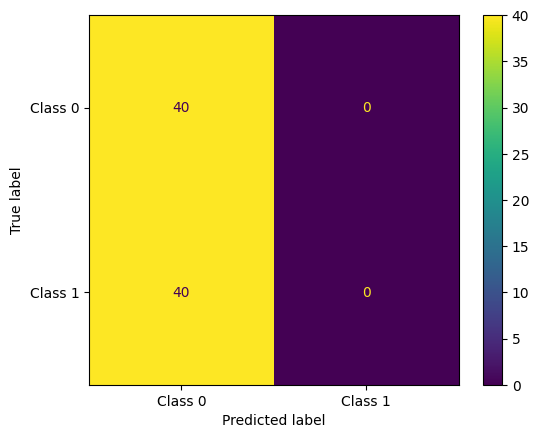

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
predictions = trainer_2.predict(tokenized_test)
predicted_labels = predictions.predictions.argmax(axis=-1)

# Classification report
print(classification_report(tokenized_test["label"], predicted_labels))

# Confusion matrix
cm = confusion_matrix(tokenized_test["label"], predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot()

In [ ]:
#Maybe an interactive show of how each country's POS tagging changes and also another one showing
#the confusion matrix for each country-would need to add text from news dataset

#while figuring out the streamlit version, can look into how to better fine tune BERT for this